1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)

In [53]:
import math
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
x^2

Text(0, 0.5, 'f(x)')

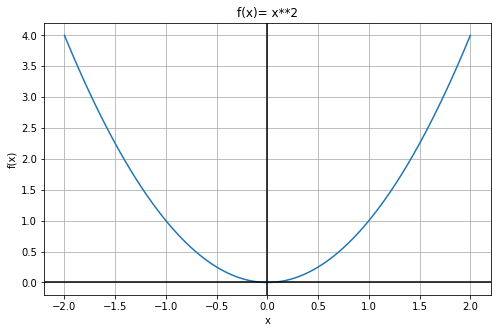

In [54]:
def f(x):
  return x**2


x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x**2')
plt.xlabel('x')
plt.ylabel('f(x)')

(x-1)^2

Text(0, 0.5, 'f(x)')

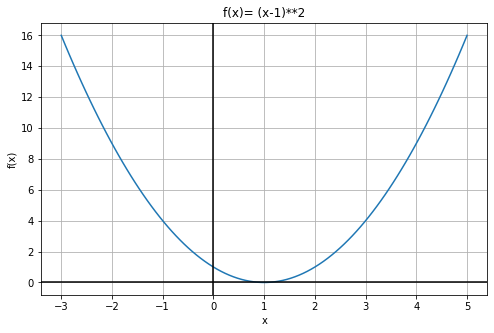

In [13]:
def f(x):
  return (x-1)**2


x = np.linspace(-3.0,5.0,100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= (x-1)**2')
plt.xlabel('x')
plt.ylabel('f(x)')

x^2 – 1

Text(0, 0.5, 'f(x)')

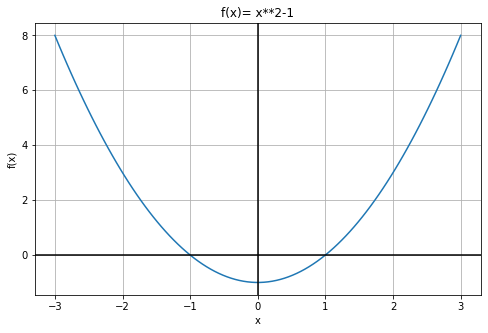

In [17]:
def f(x):
  return (x**2)-1


x = np.linspace(-3.0,3.0,100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x**2-1')
plt.xlabel('x')
plt.ylabel('f(x)')

x^2+ 1

Text(0, 0.5, 'f(x)')

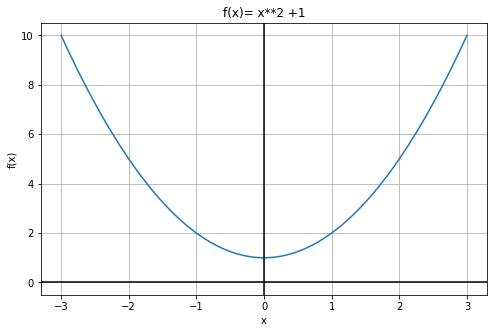

In [71]:
def f(x):
  return x**2+1


x = np.linspace(-3.0,3.0,100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x**2 +1')
plt.xlabel('x')
plt.ylabel('f(x)')

2.Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations

a. Definition of the functions.

In [51]:
def f(x):
  return x**2

def classicMethod(a,b,c):
  dis=b*b-4*a*c 
  print("Solution by classic method")
  if (dis == 0):
      sol=-b/2*a
      print("The only root is: ")
      print(sol)
  elif (dis>0):
      sol1=(-b+math.sqrt(dis))/2*a
      sol2=(-b-math.sqrt(dis))/2*a
      print("The roots are: ")
      print(sol1)
      print(sol2)
  else:
      print("The roots are complex")
      
  

def  PoShenMethod (b,c):
  print("Solution by PO Shen Loh's method")
  root=(b**2/4)-c
  print(root)
  if (root>0):
    u=math.sqrt(root)
    sol1=(b/2)+u
    sol2=(b/2)-u
    print("The roots are: ")
    print(sol1)
    print(sol2)
  elif (root==0):
    u=math.sqrt(root)
    sol=b/2
    print("The only root is: ")
    print(sol)
  else:
    print("The roots are complex")


b. Solutions

x^2 = 0

In [46]:
print("Solution for x**2=0")
classicMethod(1,0,0)
PoShenMethod(0,0)

Solution for x**2=0
Solution by classic method
The only root is: 
0.0
Solution by PO Shen Loh's method
The only root is: 
0.0


(x-1)^2 = 0

In [52]:
print("Solution for (x-1)**2=0")
classicMethod(1,-2,1)
PoShenMethod(-2,1)

Solution for (x-1)**2=0
Solution by classic method
The only root is: 
1.0
Solution by PO Shen Loh's method
0.0
The only root is: 
-1.0


x^2 – 1 =0

In [47]:
print("Solution for x**2 – 1 =0")
classicMethod(1,0,-1)
PoShenMethod(0,-1)

Solution for x**2 – 1 =0
Solution by classic method
The roots are: 
1.0
-1.0
Solution by PO Shen Loh's method
The roots are: 
1.0
-1.0


x^2+ 1 =0


In [48]:
print("Solution for x**2+ 1 =0")
classicMethod(1,0,1)
PoShenMethod(0,1)

Solution for x**2+ 1 =0
Solution by classic method
The roots are complex
Solution by PO Shen Loh's method
The roots are complex


3. Plot the newton fractals for the corresponding complex quadratic polynomials

z^2

In [69]:
def f(z):
    return z ** 2 

def df(z):
    return 2 * z


def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("X region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=x^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
X region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


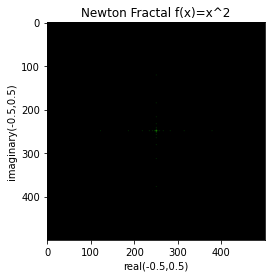

In [70]:
print("zoom out")
display1(zoom=1)
#display1(zoom=2)
#display1(zoom=3)
#display1(zoom=4)
#display1(zoom=5)

(z-1)^2


In [78]:
def f(z):
    return (z-1)**2

def df(z):
    return 2 * z - 2


def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("X region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(x-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()




zoom out
X region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


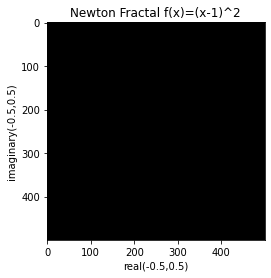

In [79]:
print("zoom out")
display1(zoom=1)

z^2 – 1

In [98]:
def f(z):
    return z**2 - 1

def df(z):
    return 2 * z 


def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("X region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=x^2 - 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
X region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


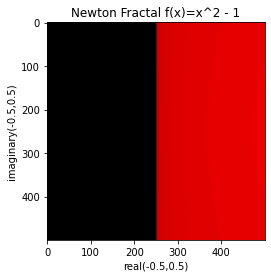

In [97]:
print("zoom out")
display1(zoom=1)

z^2+ 1

In [99]:
def f(z):
    return z**2 + 1

def df(z):
    return 2 * z 


def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("X region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=x^2 + 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
X region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


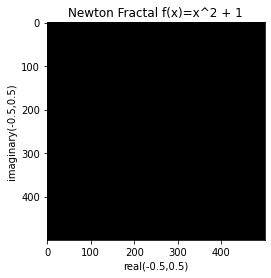

In [100]:
print("zoom out")
display1(zoom=1)

4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3. 

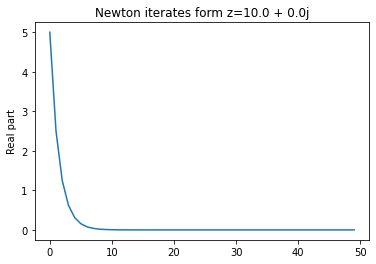

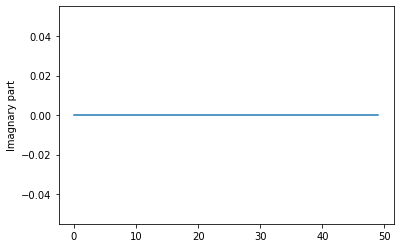

In [105]:
def f(z):
    return z**2 

def df(z):
    return 2*z 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

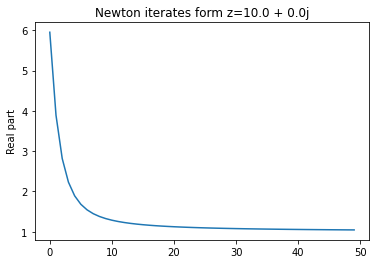

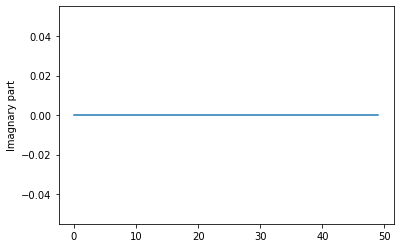

In [107]:
def f(z):
    return (z-1)**2 

def df(z):
    return 2*z 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

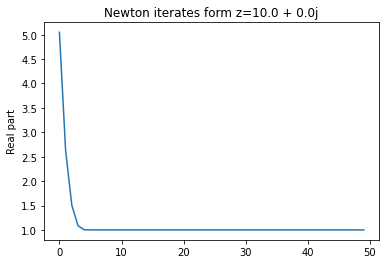

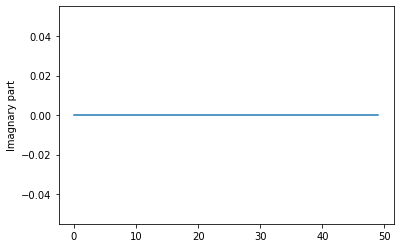

In [102]:
def f(z):
    return z**2 -1

def df(z):
    return 2*z 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

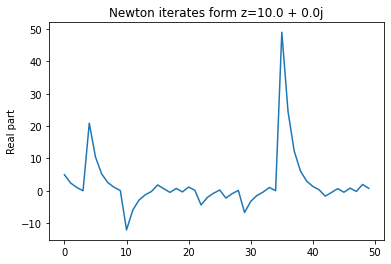

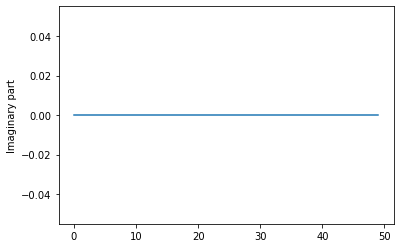

In [112]:
def f(z):
    return z**2 + 1

def df(z):
    return 2*z 

z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In the first three iterates, we see a common pattern: Theres a heavy fall before 10, and then an asymptote. The last one however, doesn't have a pattern, and it's behavior appears to be completely random. This can possibly be, because is the only one to have complex roots, so it's not possible to have a representation in the real part. It's also worth noting that in all four the imaginary part appears as a constant in 0, even the last one with complex roots; this means that during the iteration, there are no imaginiary returns, other than 0. 

